# EDA & FEATURE ENGINEERING

In this notebook the data is cleaned/prepped, explored, and reflections are mined from the therapist answers for downstream modeling.

## LOAD AND PREP DATA

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

In [2]:
df = pd.read_csv(Path('.') / 'data' / '20200325_counsel_chat.csv')

In [3]:
df.shape

(2271, 11)

In [4]:
pd.set_option('max_colwidth', 200)

In [5]:
df.head()

,questionID,questionTitle,questionText,questionLink,topic,therapistInfo,therapistURL,answerText,upvotes,views,split
0,0,Can I change my feeling of being worthless to everyone?,I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n I've never tried or contemplated suici...,https://counselchat.com/questions/can-i-change-my-feeling-of-being-worthless-to-everyone,depression,"Sherry Katz, LCSWCouples and Family Therapist, LCSW",https://counselchat.com/therapists/sherry-katz-lcsw,"If everyone thinks you're worthless, then maybe you need to find new people to hang out with.Seriously, the social context in which a person lives is a big influence in self-esteem.Otherwise, you ...",1,2899,train
1,0,Can I change my feeling of being worthless to everyone?,I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n I've never tried or contemplated suici...,https://counselchat.com/questions/can-i-change-my-feeling-of-being-worthless-to-everyone,depression,"Robin Landwehr, DBH, LPCC, NCCMental Health in a Primary Care Setting",https://counselchat.com/therapists/robin-landwehr-dbh-lpcc-ncc,"Hello, and thank you for your question and seeking advice on this. Feelings of worthlessness is unfortunately common. In fact, most people, if not all, have felt this to some degree at some point ...",1,3514,train
2,0,Can I change my feeling of being worthless to everyone?,I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n I've never tried or contemplated suici...,https://counselchat.com/questions/can-i-change-my-feeling-of-being-worthless-to-everyone,depression,Lee KingI use an integrative approach to treatment and have an online therapy practice.,https://counselchat.com/therapists/lee-king,First thing I'd suggest is getting the sleep you need or it will impact how you think and feel. I'd look at finding what is going well in your life and what you can be grateful for. I believe ever...,0,5,train
3,0,Can I change my feeling of being worthless to everyone?,I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n I've never tried or contemplated suici...,https://counselchat.com/questions/can-i-change-my-feeling-of-being-worthless-to-everyone,depression,"Shauntai Davis-YearginPersonalized, private online counseling for individuals and couples",https://counselchat.com/therapists/shauntai-davis-yeargin,Therapy is essential for those that are feeling depressed and worthless. When I work with those that are experiencing concerns related to feeling of depression and issues with self esteem. I gener...,0,31,train
4,0,Can I change my feeling of being worthless to everyone?,I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n I've never tried or contemplated suici...,https://counselchat.com/questions/can-i-change-my-feeling-of-being-worthless-to-everyone,depression,Jordan WhiteLicensed Social Worker at Oak Roots Dynamic,https://counselchat.com/therapists/jordan-white,I first want to let you know that you are not alone in your feelings and there is always someone there to help. You can always change your feelings and change your way of thinking by being open to...,0,620,train


In [6]:
for c in ['questionTitle', 'questionText', 'answerText']: df[c] = df[c].astype(str)

## EXPLORATORY DATA ANALYSIS

### question and answer lengths

In [7]:
qu_lens = df.questionText.apply(lambda x: len(x.split()))
an_lens = df.answerText.apply(lambda x: len(x.split()))

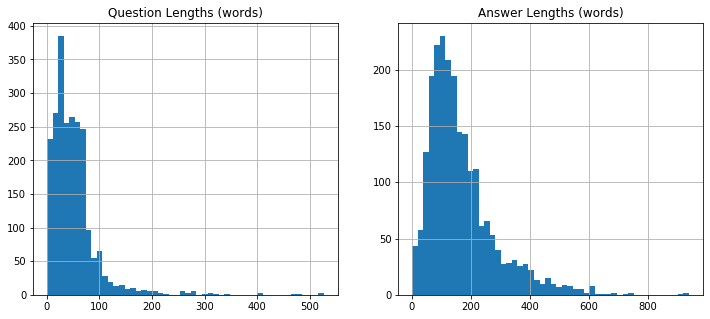

In [8]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.hist(qu_lens, bins=50); ax1.set_title('Question Lengths (words)'); ax1.grid()
ax2.hist(an_lens, bins=50); ax2.set_title('Answer Lengths (words)'); ax2.grid()
plt.show()

In [9]:
len(df), df.questionTitle.nunique(), df.questionText.nunique(), df.answerText.nunique()

(2271, 890, 827, 2127)

### data structure

- many questions have multiple answers
- most answers are unique, but there are some duplicates

How many answers per question?

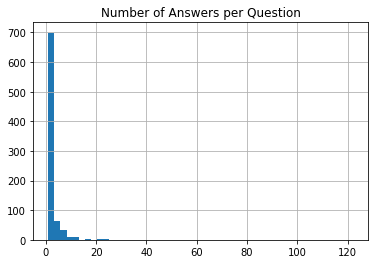

In [10]:
fig, ax = plt.subplots()
_ = ax.hist(df.groupby('questionText').size().values, bins=50)
ax.set_title('Number of Answers per Question'); ax.grid()

### observe some data

In [11]:
def print_sample():
    sample_qid = df.sample(1)['questionID'].iloc[0]
    qu_mask = df.questionID == sample_qid
    df_qu = df[qu_mask]
    print('QUESTION:')
    print(df_qu.iloc[0]['questionText'])
    for idx, row in df_qu.iterrows():
        print('\nANSWER:')
        print(row['answerText'])

In [12]:
# print_sample()

`print_sample()`

QUESTION:
My brother has been diagnosed with paranoid schizophrenia and has not been taking his medication. He's been using methamphetamine and alcohol and was found sleeping naked in my step mom driveway in 12 degree weather.
   I was adopted in by his dad (who just passed) and his mother will not Get involved because she's afraid of financial responsibility.    Do I have the rights to be able to sign my brother into mentalhealth facility?

ANSWER:
I'm sorry to hear that your brother has been having such a rough time. He's lucky to have you on his side (although he may not always see it that way).As far as whether you can sign him in, that depends on a lot of different things.I would suggest that you Google the state and county that you live in as well as some phrase similar to "crisis hotline." They can tell you how it works in that county. My guess is that you could sign him in as long as he met the criteria for admission at that moment, but I can't  be entirely sure. You could also ask the person on the phone about financial responsibility. I have not heard of that being a problem, but I guess it would depend on insurance.If you have trouble finding a local  hotline, consider calling the national crisis number (800-273-8255) and ask them to help you find someone local.

ANSWER:
Thanks for asking this question. I know it can be really difficult to deal with issues like this.To answer your question, you might be able to get you brother some mental health help, even if he doesn't recognize that he needs it. In most states, an individual can request a mental health evaluation of a family member if that family member poses a danger to themselves or someone else, or if they are unable to take care of their own basic needs.You can always call 911 if you are concerned about his immediate safety (for example if you find him sleeping outside in below freezing weather.  As an alternative to calling 911, you might also be able to request an evaluation from an authorized mental health provider.  The deatsils of who you would contact vary from state to state. Here's a link with some additional resources:http://www.treatmentadvocacycenter.org/someone-i-know-is-in-crisisHe's lucky to have a brother who cares for his wellbeing as much as you do.

ANSWER:
The answer depends on what State you live.Since the description you write here is that your brother may be a serious risk to himself and others, it is worth contacting a mental health hotline or one of your local area hospitals and talk to a social worker or other professional level person in their psychiatry department.  Ask the same question you posted here.   Your question is a good one and merits serious follow through.

ANSWER:
Hello, My heart goes out to you, your brother, and your family, dealing with a very painful and difficult situation. In New York, you can't institutionalize someone else directly. You can, however, call the police or EMS. If they agree that he would benefit from hospitalization (and it sounds like they would), he can be held in the hospital for up to 72 hours, whether he agrees or not. Some hospitals will not hold a person that long, in spite of what we might want. I have seen many patients in and out of hospitals countless times, and it has been my experience that it can be extremely difficult to hold a person long enough to achieve good stability and an appropriate after-care plan. Hospitals in NYC tend to take a "patch and release" approach more often than I would like. It's been my experience that family makes a difference. Assertive, knowledgeable, persistent family can improve the quality of your loved one's care. Hospitals are highly pressured to discharge people quickly but they can not discharge a homeless person without someplace to go. If your family is willing to accept your brother, that will be the path of least resistance for the hospital. If the family refuses, they will be forced to find another path for him. You can also pressure the hospital to refer to rehab after psychiatrically stablized (which may only take a few days) and that may give your brother more time to begin making clear-headed decisions. If your brother has a psychiatrist, that person should be actively involved. I had a patient patched-and-released three times, in spite of my advocacy and him literally begging to remain and stop his voices. We finally got a 90 day hospitalization because I strong-armed his psychiatrist into demanding that the hospital stabilize his patient.  If your brother has a history of non--compliance with oral medications, you can push the hospital for injection, which again will help your brother stay stable for longer. Best wishes to you and your family.

ANSWER:
Family members sometimes get Power of Attorney over vulnerable adults. If you had this, you could do something like that. I'm assuming that you don't, though. There are steps family members can take through the court system to get someone involuntarily committed, but it is a long process. I deal with situations like this everyday on the job. The only time an adult can be committed against their will is if they are deemed by the doctor (such as at an emergency room) to be a threat to self or others. For instance, if he had suicidal thoughts and a plan to carry out the action, or if he had homicidal thoughts against someone else and a plan to carry it out, he could be placed on a short hold, but these holds only last for a few days. This still isn't a long-term solution. An adult has the right to refuse treatment and the right to make their own choices, no matter how bad those choices are. If you have a way to get him to an ER whenever things like that happen, such as being found sleeping outside in 12 degree weather, it will help a lot. They may or may not do a short term commitment for treatment based on the situation that brings him to the ER, but it's a start. They can help set him up with appointments for psych and he can get on medications. You can help by taking him to appointments and making sure his medications get filled. However, you can't force him to take the meds, so this may be something that happens a lot. With enough of a paper trail of many ER visits and that sort of thing, you'll stand a better chance of getting a court appointed psych ward stay. Some tips about ER visits: Don't send him alone. Always go with him or have someone go with him, because you will be able to give the treatment team better insight into what's going on than he will. He may say everything's fine and he wants to leave, so they won't have any reason to keep him if that is the case. Go with him. If you do get Power of Attorney, take the paperwork with you when you go to the ER and to doctor's appointments because they aren't just going to take your word. They need to see the actual paperwork. Having it on file in their system isn't good enough because paperwork expires, etc. Take it with you at all times. You can also compile his medical records and that sort of thing to take with you so they can see a full history of what's going on.Keep in mind that if you do get Power of Attorney, this makes you his guardian and you have to take care of him. Otherwise, you can get reported for vulnerable adult abuse and neglect. In fact, your mom ignoring and not helping may already put her at risk of that because she is willingly doing nothing to help someone who clearly needs the help. She won't be financially responsible for the hospital or doctor bills, but should be held responsible for his safety. Someone should. There are group homes for people with schizophrenia. " Being responsible" for someone doesn't mean you have to pay their bills, it just means you are going to make sure they get the care they need. That care may be placement in a long-term care facility like a group home or a nursing home. Psych inpatient hospitals aren't long-term, so you do need to look into other long-term options. Psych inpatient stays are temporary and are to stabilize him, they're not where someone stays forever.Good luck, and keep up the good attitude! Work with his treatment team. Ask for a social worker. If they see family that is wanting to do the right thing and wanting to help, they'll help you even if it does take a while to get things sorted out. The worst thing any of you can do is NOT go to appointments and that sort of thing.


> It seems like since the "winter blues" happens to you every year it may also be impacting your quality of life and possibly relationships.

### How reliable is the `questionID` field?

In [13]:
df.groupby('questionID')['questionTitle'].nunique().to_frame(
    'num_questionTitles').groupby('num_questionTitles').size()

num_questionTitles
1    864
2     21
dtype: int64

In [14]:
df.groupby('questionID')['questionText'].nunique().to_frame(
    'num_questionTitles').groupby('num_questionTitles').size()

num_questionTitles
1    864
2     21
dtype: int64

Most `questionID`s map to a single `questionText`/`questionTitle`. It isn't perfect, but is reliable enough for now.

# TRAIN/TEST SPLIT

In [15]:
df.split.value_counts(dropna=False)

train    1963
val       185
test      123
Name: split, dtype: int64

# REFLECTION MINING

### first sentence

In [16]:
sent_split_regex = re.compile(r'(?<=\.|\?|\!)\s?')
def get_first_sentence(s):
    sentences = sent_split_regex.split(s)
    return sentences[0].strip()

df['first_an_sent'] = df.answerText.apply(get_first_sentence)

In [17]:
df[['answerText', 'first_an_sent']].sample(10)

,answerText,first_an_sent
1620,"This can be difficult and confusing.If you think your boyfriend would be open to having a discussion, try asking him for a time when he is willing to have an important discussion. When that time m...",This can be difficult and confusing.
1805,"Use this time to explore who you are...imagine what your life would be like if you were gay and not, ask yourself what is different? What scenario do you find yourself gravitating to? What is imp...",Use this time to explore who you are.
947,"The older I get, the more I believe that our real task isn't to 'find' ourselves. We're already 100% ""there."" What we do have to do is become more mindful of the times when we feel the most alive,...","The older I get, the more I believe that our real task isn't to 'find' ourselves."
240,"When you are at your lowest, you have an opportunity to learn not just about the people around you and who you can depend on, but also, so much about yourself and why you have come to the place th...","When you are at your lowest, you have an opportunity to learn not just about the people around you and who you can depend on, but also, so much about yourself and why you have come to the place th..."
279,"I agree with Cory. Acceptance and Commitment Therapy (ACT) does seem to help a lot of people who struggle with anxiety. It's not the only type of therapy that can help, but it seems to help people...",I agree with Cory.
2197,"I love this question! Some people shy away from counseling because they think since they already talk about how they feel to their relatives or friends they shouldn't need a counselor. However, if...",I love this question!
517,"Hi Houston, Okay, something's definitely going on, right? My gut is to start with your family physician, because you have some physical symptoms. While it seems anxiety is a likely problem here, y...","Hi Houston, Okay, something's definitely going on, right?"
1037,Check with your local non-profit agencies. I am sure there are programs which provides services for others in the same financial position as you. Many have sliding scale fees based on your incom...,Check with your local non-profit agencies.
1880,I am sorry to hear that you are going through such a tough time. It sounds to me like you are suffering from depression to some degree. Have you seen a therapist or talked to anyone about your pro...,I am sorry to hear that you are going through such a tough time.
2093,"Yes, it is very normal to cry during a therapy appointment. When you meet with a counselor, you are opening yourself up and sharing very vulnerable sides of yourself. Through this deep introspec...","Yes, it is very normal to cry during a therapy appointment."


In [18]:
df[['answerText', 'first_an_sent']].sample(10)

,answerText,first_an_sent
274,"One of the first steps is to manage anxiety and depression symptoms are to establish a good self-care routine. Start with the most basic things: Eating balanced meals, sleeping at from 6-8 hours ...",One of the first steps is to manage anxiety and depression symptoms are to establish a good self-care routine.
1484,"Hello, and thank you for your question. This is certainly a tough spot. I have a few thoughts and perhaps some colleagues will add some things. You may want to spend a few minutes calling to mind ...","Hello, and thank you for your question."
1738,Your partners obviously very confused when it comes to love. Sometimes people shy away from good and positive relationships and companionship because their afraid. They know that it's something wo...,Your partners obviously very confused when it comes to love.
24,It is never too late to get help and begin making significant changes and improvements in your life. The right time is when you feel ready and open to change. Sometimes when we have a history of...,It is never too late to get help and begin making significant changes and improvements in your life.
1142,"It may be helpful to have this emotionally impactful conversation in the context of couples therapy.Whether or not you should get a divorce is not the first question that comes to mind for me, but...",It may be helpful to have this emotionally impactful conversation in the context of couples therapy.
1595,"The most important thing to ask yourself here is, ""how did this action affect my relationship, and is it worth the consequences?"" Regardless of your intentions in this action, your boyfriend is un...","The most important thing to ask yourself here is, ""how did this action affect my relationship, and is it worth the consequences?"
1531,"For how long has the arguing been occurring and does it relate to a specific incident or circumstance in your relationship?Arguing due to temporary stress and feeling lost or uncertain, is differe...",For how long has the arguing been occurring and does it relate to a specific incident or circumstance in your relationship?
1516,"Do you have a close friend or relative who's opinion you trust? Ask them for their honest feedback and if they see you like your cousin does. If they don’t see these qualities in you, then it may ...",Do you have a close friend or relative who's opinion you trust?
110,I applaud your courage in asking this question to gain some deeper insight into what is happening in your life. This is one of the most common things that I personally have seen in the population ...,I applaud your courage in asking this question to gain some deeper insight into what is happening in your life.
1250,"Are you upset, is the more pertinent question.Everyone has their own tolerance for lies and their unique reasons for being married. Trust your own answers to the question you ask here.Also, think...","Are you upset, is the more pertinent question."


### "seems like" / "sounds like"

In [19]:
import re
seem_sounds_regex = re.compile(r'^.{0,50}?(?:seems\slike)|(?:sounds\slike)')

In [20]:
def extract_seems_sounds(s):
    sents = sent_split_regex.split(s)
    for sent in sents:
        match = seem_sounds_regex.match(sent.lower())
        if match is not None: return sent.strip()

In [21]:
df['seems_sounds_sents'] = df.answerText.apply(extract_seems_sounds)

In [22]:
df.seems_sounds_sents.isnull().value_counts()

True     2230
False      41
Name: seems_sounds_sents, dtype: int64

This method did not yield many new reflections. Only 41 out of 2k+. 

In [23]:
seems_sounds_mask = df.seems_sounds_sents.notnull()
df.loc[seems_sounds_mask, ['answerText', 'seems_sounds_sents']].sample(10)

,answerText,seems_sounds_sents
1594,"It is not the case of being right or wrong, in my view. If you are asking, I believe you truly care for your boyfriend. It seems like he is having difficulties in establishing trust in this relati...",It seems like he is having difficulties in establishing trust in this relationship.
1702,This seems like two questions. The first is what may have happened to prompt him to back off. The second is what it means to you to have a boyfriend who takes anti-depression medication who says...,This seems like two questions.
684,Your nephew's behavior sounds normal and developmentally appropriate. Masturbation is a healthy expression of sexuality. Most families to create some rules about where it's ok to masturbate-- fo...,It seems like that would help him and you handle his increasing maturity.
833,Sounds like you need closure. I'm sure your doing your best to overcome this feeling but seem to be struggling with your own happiness. Trust God no one else. Give this some time and don't close y...,Sounds like you need closure.
209,"Teenage years are rough for anyone, and this is a time for self-discovery and experimentation. Having older parents can certainly pose challenges. Most kids feel like their parents don't understan...","It seems like you're looking for affirmation from them, looking for their approval and understanding."
1051,"I'm very sorry to hear this. Hypnosis can be a valuable tool that a trained therapist can use to bring back suppressed memories. However, keep in mind that hypnosis doesn't work for everyone. I th...",It seems like you have experienced some painful experiences in the past and may need help dealing with them in order to move forward.
663,Hey! Sounds like the part of you that knows the RIGHT thing to do won here! I am so proud of you for admitting that you lied to your Mom! Sometimes lies come out of our mouths before we can even c...,Sounds like the part of you that knows the RIGHT thing to do won here!
267,"It seems like you may be experiencing depression symptoms, they could be the triggered by unexpected life changes, or building up throughout time.The important part is that you have identified the...","It seems like you may be experiencing depression symptoms, they could be the triggered by unexpected life changes, or building up throughout time."
2040,You should like and trust your counselor. Sounds like a big ole “DUH”. But you will not believe the number of people I have met with that have described their past counselor as “totally opposite t...,Sounds like a big ole “DUH”.
1897,"It might be possible, but it's difficult. First, depending on how old you are, you might be able to restrict a mentalhealth provider from disclosing your confidential information to your paren...",It seems like you might have a few options.


### construct a reflection for each example

Assume that the "seems like"/"sounds like" sentences are higher quality reflections than the first sentences.

In [24]:
df['reflection'] = df.first_an_sent

seems_sounds_mask = df.seems_sounds_sents.notnull()
df.loc[seems_sounds_mask, 'reflection'] = df.loc[seems_sounds_mask, 'seems_sounds_sents']

### post-process to alleviate tokenization errors

The sentence splitting breaks in some cases. This results in some very long reflections.

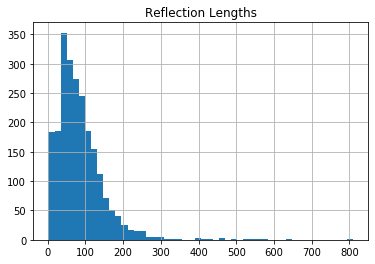

In [25]:
re_lens = df.reflection.apply(lambda x: len(x))

fig, ax = plt.subplots()
ax.hist(re_lens, bins=50); ax.set_title('Reflection Lengths'); ax.grid()
plt.show()

In [26]:
df.reflection = df.reflection.apply(lambda x: x[:250])

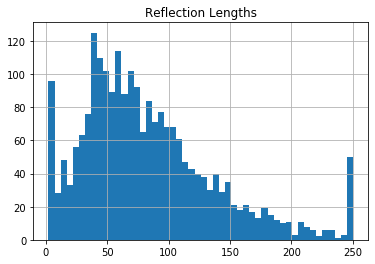

In [27]:
re_lens = df.reflection.apply(lambda x: len(x))

fig, ax = plt.subplots()
ax.hist(re_lens, bins=50); ax.set_title('Reflection Lengths'); ax.grid()
plt.show()

There are a lot of very short reflections (the first bin in the histogram). In a real world use case I would investigate these further. For now I will move on for the sake of time.